In [1]:
from typing import Annotated, TypedDict, List, Literal
import operator
from langgraph.graph import StateGraph, START, END

# Step 1: Define state with merge logic
class State(TypedDict):
    a : str
    b : str
    c : str
    num : float
    result : str

# Step 2: Define the start and individual nodes
def start(_: State) -> State:
    return {}

def condition_check(state: State) -> Literal['node_a', 'node_b', 'node_c']:
    if state["a"] == "true":
        return 'node_a'
    elif state["b"] == "true":
        return 'node_b'
    elif state["c"] == "true":
        return 'node_c'
    else:
        print("No conditions met")
        return state

def node_b(state: State) -> State:
    print("Condition B is true")
    state["result"] = "B was executed"
    return {"result": state["result"]} 

def node_a(state: State) -> State:
    print("Condition A is true")
    state["result"] = "A was executed"
    return {"result": state["result"]}

def node_c(state: State) -> State:
    print("Condition C is true")
    state["result"] = "C was executed"
    return {"result": state["result"]}


# Step 3: Build the graph
graph = StateGraph(State)
graph.add_node("node_a", node_a)
graph.add_node("node_b", node_b)
graph.add_node("node_c", node_c)


graph.add_conditional_edges(START, condition_check)
graph.add_edge("node_a", END)
graph.add_edge("node_b", END)
graph.add_edge("node_c", END)

# Step 4: Compile and run
app = graph.compile()
result = app.invoke({"b":"true", "c":"false", "a":"false"})
print(result)


Condition B is true
{'a': 'false', 'b': 'true', 'c': 'false', 'result': 'B was executed'}


/Users/devanshu/Desktop/exploring-langgraph/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


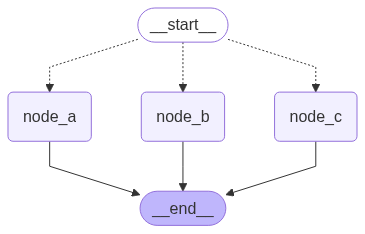

In [2]:
app